In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)        # Adjust width for better readability

df = pd.read_csv( 'cleaned_data_1.csv' )

print( df.dtypes )
print( df.head() )

# Ensure 'date' is in datetime format and extract year and month as strings
df['date'] = pd.to_datetime( df['date'], format='%m/%d/%y' )
df['month_year'] = df['date'].dt.strftime( '%Y-%m' )  # Format as 'YYYY-MM'
df['year'] = df['date'].dt.year

# Create a full range of month-year combinations using date_range and formatting as strings
full_range = pd.date_range( start = df['date'].min(), end = df['date'].max(), freq = 'ME' ).strftime( '%Y-%m' )

# merging "Customer Relations" and "Email & Customer Relations"
df['activity_subtype'] = df['activity_subtype'].replace('Customer Relations', 'Email & Customer Relations')


timestamp           object
application         object
activity_type       object
activity_subtype    object
duration             int64
date                object
hour                 int64
dtype: object
             timestamp application activity_type            activity_subtype  duration     date  hour
0  2021-01-22 17:00:00        shed    Focus Work                  Operations       342  1/22/21    17
1  2021-01-22 17:00:00       email    Focus Work  Email & Customer Relations       249  1/22/21    17
2  2021-01-22 17:00:00      finder     Utilities                     General       216  1/22/21    17
3  2021-01-22 17:00:00       slack    Focus Work              Communications       169  1/22/21    17
4  2021-01-22 17:00:00       slack    Focus Work              Communications       145  1/22/21    17


# Application Usage Over Time by Month
In this section, we analyze the usage of different applications over time, specifically by month. The goal is to identify trends and patterns in application usage, which could provide insights into productivity and focus areas.

The graph below displays the total usage time for selected applications, plotted by month. A vertical line is included at July 2022 to indicate when the significant job title change occurred, reflecting a shift in focus from daily operations to functioning like subject matter expertise.

Before the job title change, I used Google Sheets to help manage a pool of customers and process analytical data on their status in each phase of the life cycle funnel.  After the job title change, I took on more of an analyst and auditor type of role.  I used google sheets more to look at specific issues in our operations systems that needed to be fixed.  

Key insights to look for in the graph include potential shifts in application usage corresponding to the job title change, as well as any notable trends in specific applications that reflect the evolving focus of the work.

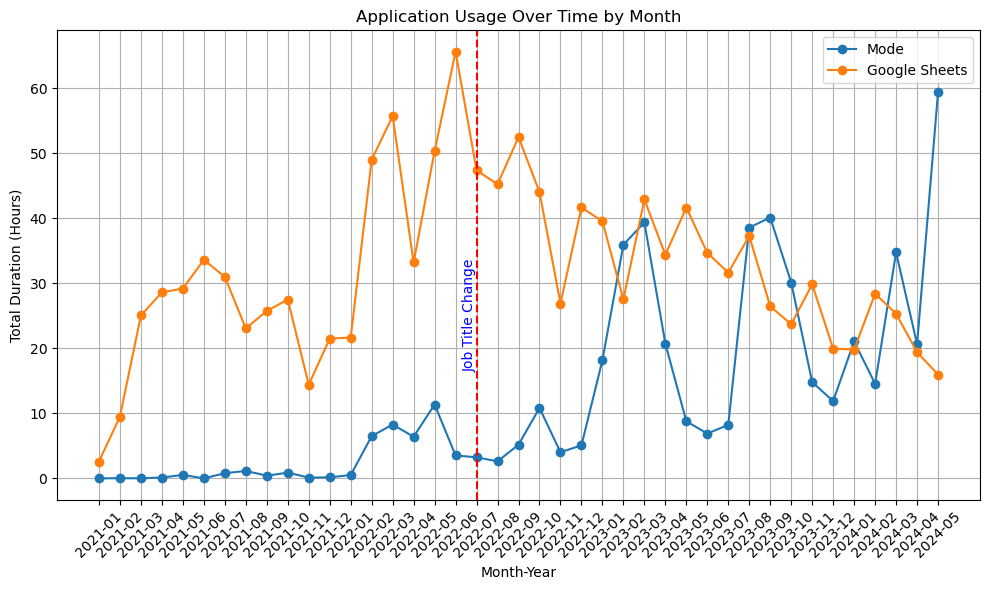

<Figure size 640x480 with 0 Axes>

In [3]:

# Filter and group by month for "Mode"
mode_data = df.loc[df['application'] == 'mode'].copy()
mode_data['duration'] = mode_data['duration'] / 3600  # Convert seconds to hours
mode_usage_by_month = mode_data.groupby( 'month_year' )['duration'].sum().reindex( full_range, fill_value = 0 ).reset_index()
mode_usage_by_month.columns = ['month_year', 'duration']  # Ensure correct column names

# Filter and group by month for "Google Sheets"
sheets_data = df.loc[df['application'] == 'google sheets'].copy()
sheets_data['duration'] = sheets_data['duration'] / 3600  # Convert seconds to hours
sheets_usage_by_month = sheets_data.groupby( 'month_year' )['duration'].sum().reindex( full_range, fill_value = 0 ).reset_index()
sheets_usage_by_month.columns = ['month_year', 'duration']  # Ensure correct column names

# Plot both lines
plt.figure( figsize = ( 10, 6 ) )

# Plot for Mode
plt.plot( mode_usage_by_month['month_year'], mode_usage_by_month['duration'], marker = 'o', label = 'Mode' )

# Plot for Google Sheets
plt.plot( sheets_usage_by_month['month_year'], sheets_usage_by_month['duration'], marker = 'o', label = 'Google Sheets' )

# Labels and grid
plt.title( 'Application Usage Over Time by Month' )
plt.xlabel( 'Month-Year' )
plt.ylabel( 'Total Duration (Hours)' )
plt.grid( True )
plt.axvline( x = '2022-07', color = 'red', linestyle = '--' )
plt.text( 
    x = '2022-07', 
    y = 25, 
    s = 'Job Title Change', 
    color = 'blue', 
    rotation = 90, 
    verticalalignment = 'center', 
    horizontalalignment = 'right' 
)
plt.xticks( rotation = 45 )
plt.legend()  # Add a legend to distinguish the lines
plt.tight_layout()
plt.show()
plt.clf()

# Job Focus and Activities Over Time by Month

In this section, we analyze the usage of different applications over time based on job focus.  The goal is to identify trends and patterns in application usage based on the focus between customer relations and Analytics driven activities.

The graph below displays the total usage time for applications with different activity subtypes, plotted by month.  The Job title change line is included as well to help reflect the change in focus.

I have included a list of the top 3 applications for each of the subtypes for visibility into which systems I was using in each.

Key insights to look for in the graph includes a very distinct shift in activities due to the job title change.  


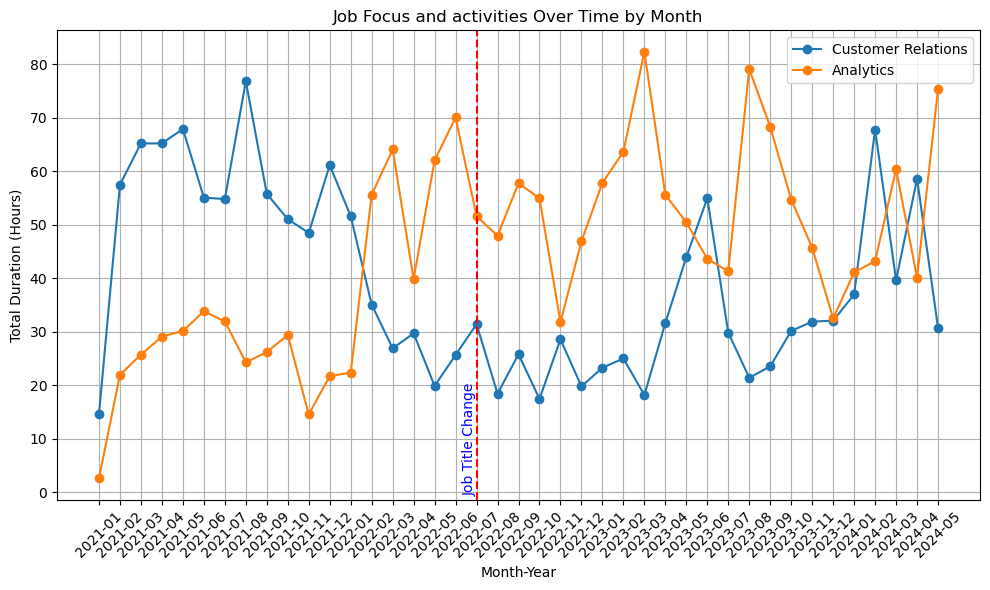

Top 3 applications for Email & Customer Relations:
email
adobe
app.carerev.com


Top 3 applications for Operations:
shed
slab
salesforce


Top 3 applications for analytics:
google sheets
mode
excel




In [26]:
# filter and group by month for email application
customer_relations = df[
    (df['activity_subtype'] == 'Email & Customer Relations' ) |
    (df['activity_subtype'] == 'Operations' )
].copy()
customer_relations['duration'] = customer_relations['duration'] / 3600 #convert seconds to hours
customer_relations_usage_by_month = customer_relations.groupby( 'month_year' )['duration'].sum().reindex( full_range, fill_value = 0 ).reset_index()
customer_relations_usage_by_month.columns = ['month_year', 'duration'] #ensure correct column names

# Plt the line for email
plt.figure( figsize = ( 10, 6 ) )

plt.plot( 
    customer_relations_usage_by_month['month_year'], 
    customer_relations_usage_by_month['duration'], 
    marker = 'o', 
    label = 'Customer Relations' 
)
plt.plot( analytics_usage_by_month['month_year'], analytics_usage_by_month['duration'], marker = 'o', label='Analytics' )

# labels and grid
plt.title( 'Job Focus and activities Over Time by Month' )
plt.xlabel( 'Month-Year' )
plt.ylabel( 'Total Duration (Hours)' )
plt.grid( True )
plt.xticks( rotation = 45 )
plt.axvline( x = '2022-07', color = 'red', linestyle = '--' )
plt.text( 
    x = '2022-07', 
    y = 10, 
    s = 'Job Title Change', 
    color = 'blue', 
    rotation = 90, 
    verticalalignment = 'center', 
    horizontalalignment = 'right' 
)
plt.legend()
plt.tight_layout()
plt.show()

# Display the top 3 applications for each of the top 5 activity_types

filtered = ['Email & Customer Relations', 'Operations', 'analytics']

for subtype in filtered:
    print( f"Top 3 applications for {subtype}:" )
    
    # Filter the DataFrame for the current activity_type
    top_apps = ( df[df['activity_subtype'] == subtype ]
                .groupby( 'application' )['duration']
                .sum()
                .sort_values( ascending = False )
                .index[:3]
               )  # Get the top 3 application names
    
    # Print the application names
    for app in top_apps:
        print( app )
    print( "\n" )

# Breakdown of time spent on Analytics activities by year

In this section, we have a quick visual display of the amount of time spent with a focus on analytics per year with time reflected in hours. It also shows the total number of hours completed per year and the percentage of time focused on analytics activities.  

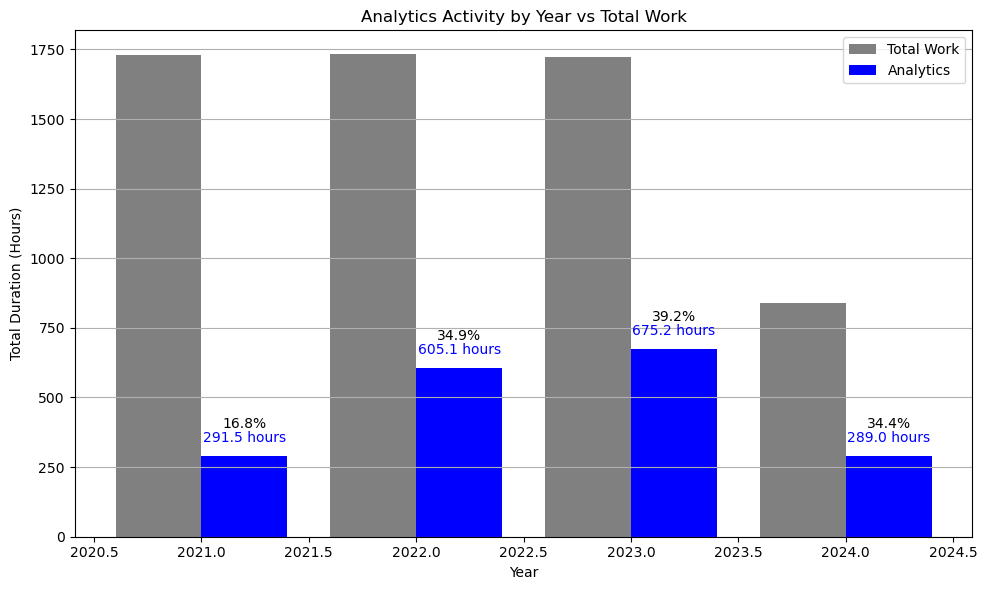

<Figure size 640x480 with 0 Axes>

In [59]:
# Step 1: Calculate total work duration by year (across all subtypes)
total_work_data = df.copy()
total_work_data['duration'] = total_work_data['duration'] / 3600  # Convert seconds to hours
total_work_by_year = total_work_data.groupby( 'year' )['duration'].sum().reset_index()

# Step 2: Filter and group by year for "Analytics" activity_subtype
analytics_data = df.loc[df['activity_subtype'] == 'analytics'].copy()
analytics_data['duration'] = analytics_data['duration'] / 3600  # Convert seconds to hours
analytics_usage_by_year = analytics_data.groupby( 'year' )['duration'].sum().reset_index()

# Step 3: Plot the bar graph for both total work and analytics duration
plt.figure( figsize = ( 10, 6 ) )

# Calculate the percentage of analytics time relative to total work time per year
percentages = ( analytics_usage_by_year['duration'] / total_work_by_year['duration'] ) * 100

# Plot the side-by-side bars as before
plt.bar( total_work_by_year['year'] - 0.2, total_work_by_year['duration'], width = 0.4, color = 'gray', label = 'Total Work' )
plt.bar( analytics_usage_by_year['year'] + 0.2, analytics_usage_by_year['duration'], width = 0.4, color = 'blue', label = 'Analytics' )

# Add total duration and percentage labels above the analytics bars
# Add total duration and percentage labels above the analytics bars
for i in range( len( analytics_usage_by_year ) ):
    # Label for total duration
    plt.text( 
        analytics_usage_by_year['year'][i] + 0.2, 
        analytics_usage_by_year['duration'][i] + 50,  # Significantly increased offset
        f'{analytics_usage_by_year["duration"][i]:.1f} hours', 
        ha='center', color='blue'
    )

    # Label for percentage
    plt.text( analytics_usage_by_year['year'][i] + 0.2, 
             analytics_usage_by_year['duration'][i] + 100,  # Significantly increased offset
             f'{percentages[i]:.1f}%', 
             ha='center', color='black' )

# Labels and grid
plt.title( 'Analytics Activity by Year vs Total Work' )
plt.xlabel( 'Year' )
plt.ylabel( 'Total Duration (Hours)' )
plt.grid( axis = 'y' )
plt.legend()  # Add a legend to distinguish the bars
plt.tight_layout()
plt.show()
plt.clf()

# Top 5 Activities by Total Duration and Top 3 Applications

In this section, we analyze the top 5 activities based on the total time spent on each throughout the dataset. The goal is to identify which activities were the most time-consuming and what tools or applications were primarily used for those activities.

The bar chart below displays the total duration for each of the top 5 activities, providing a visual comparison of how time was allocated across different tasks.

Additionally, a list of the top 3 applications used for each of these activities is provided to give further insight into the specific tools that were most frequently utilized.

Key insights to consider include the distribution of time across these top activities and the applications used in each group.

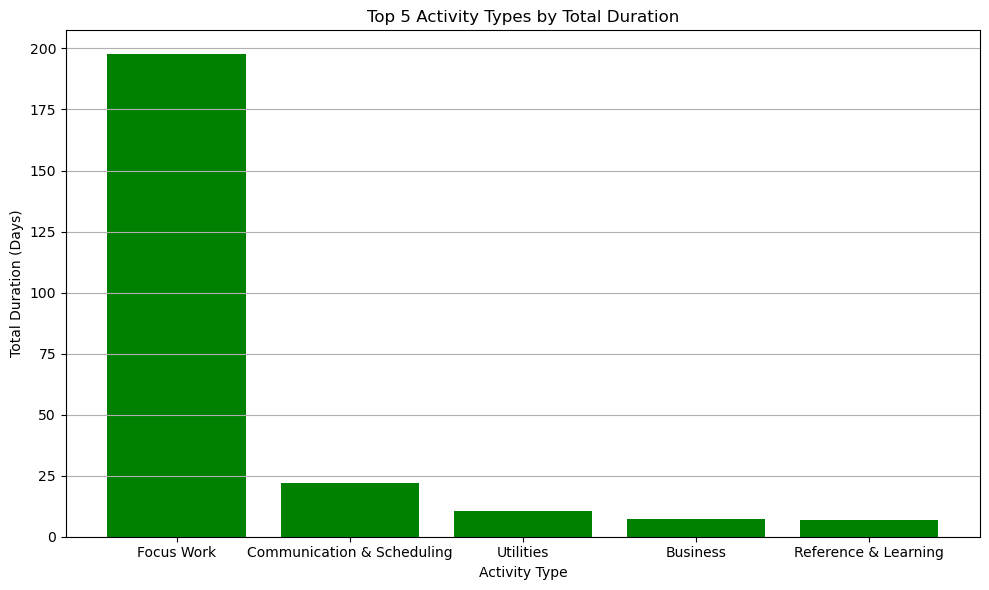

Top 3 applications for Focus Work:
google sheets
slack
shed


Top 3 applications for Communication & Scheduling:
google meet
zoom
calendar


Top 3 applications for Utilities:
finder
rescuetime
newtab


Top 3 applications for Business:
google
excel
shortcut


Top 3 applications for Reference & Learning:
slab
google
cdc.gov




<Figure size 640x480 with 0 Axes>

In [64]:
activity_type_duration = df['duration'] / 86400  # Convert seconds to days

# Combine the original 'activity_type' with the converted 'duration'
activity_type_totals = df[['activity_type']].copy()  # Create a copy of the activity_type column
activity_type_totals['duration'] = activity_type_duration  # Add the converted duration

# Calculate the total duration for each activity_type
activity_type_totals = activity_type_totals.groupby( 'activity_type' )['duration'].sum().reset_index()

# Sort and select the top 5 activity_types
top_5_activity_types = activity_type_totals.sort_values( by = 'duration', ascending = False ).head( 5 )

# Plot the bar graph
plt.figure( figsize = ( 10, 6 ) )
plt.bar( top_5_activity_types['activity_type'], top_5_activity_types['duration'], color='green' )
plt.title( 'Top 5 Activity Types by Total Duration' )
plt.xlabel( 'Activity Type' )
plt.ylabel( 'Total Duration (Days)' )
# Force a different format for the y-axis
#plt.ticklabel_format(style='plain', axis='y')
plt.grid( axis='y' )
plt.tight_layout()
plt.show()
plt.clf()

# Display the top 3 applications for each of the top 5 activity_types
for activity_type in top_5_activity_types['activity_type']:
    print( f"Top 3 applications for {activity_type}:" )
    
    # Filter the DataFrame for the current activity_type
    top_apps = ( df[df['activity_type'] == activity_type ]
                .groupby( 'application' )['duration']
                .sum()
                .sort_values( ascending = False )
                .index[:3]
               )  # Get the top 3 application names
    
    # Print the application names
    for app in top_apps:
        print( app )
    print( "\n" )

# Focus Work: Activity Subtypes Stacked by Year

In this section, we delve into the specific subtypes of focus work activities, analyzing how time was distributed among them year over year. The goal is to understand the evolution of focus areas and how these subtypes contributed to the overall workload.

The stacked bar graph below illustrates the total duration of each focus work subtype, providing a clear visual representation of how these activities were balanced across different years.

By stacking the subtypes, the graph offers a comprehensive view of both the individual and collective contributions of each focus area, highlighting any shifts or trends over time.

Key insights to look for include the relative consistency or change in the focus work subtypes and how the distribution of time reflects the evolving work priorities.

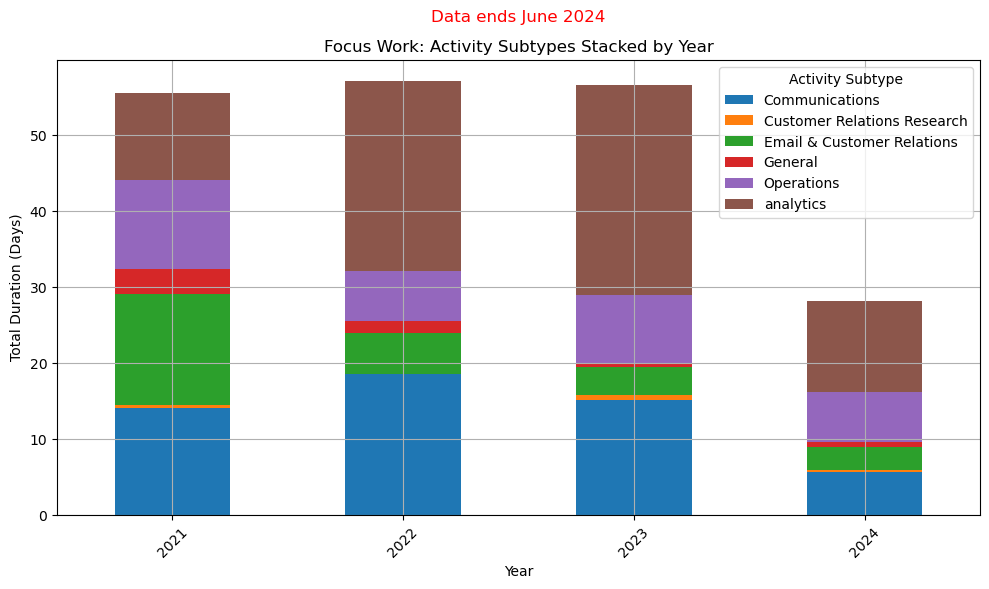

Top 3 applications for Email & Customer Relations:
email
adobe
app.carerev.com


Top 3 applications for General:
checkr
finder
google


Top 3 applications for Operations:
shed
slab
salesforce




<Figure size 640x480 with 0 Axes>

In [67]:
# Combine the original 'activity_type', 'activity_subtype', 'date', and 'application' with the converted 'duration'
activity_subtype_totals = df[['activity_type', 'activity_subtype', 'date', 'application']].copy()
activity_subtype_totals['duration'] = activity_type_duration

# Extract the year from the 'date' column
activity_subtype_totals['year'] = pd.to_datetime(activity_subtype_totals['date']).dt.year

# Filter for 'Focus Work' activity type
focus_work_data = activity_subtype_totals[activity_subtype_totals['activity_type'] == 'Focus Work']

# Group by year and activity_subtype, summing durations
yearly_subtype_data = focus_work_data.groupby(['year', 'activity_subtype'])['duration'].sum().unstack()

# Plot the stacked bar graph
yearly_subtype_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add a note indicating the data ends in June 2024, positioned just under the title
plt.text(x=1.5, y=65, s="Data ends June 2024", color='red', fontsize=12, ha='center')

# Add labels and grid
plt.title('Focus Work: Activity Subtypes Stacked by Year')
plt.xlabel('Year')
plt.ylabel('Total Duration (Days)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title='Activity Subtype')
plt.tight_layout()
plt.show()
plt.clf()

# Define the specific activity subtypes you want to analyze
specific_activity_subtypes = ['Email & Customer Relations', 'General', 'Operations']

# Loop through each of the specified activity subtypes
for subtype in specific_activity_subtypes:
    print(f"Top 3 applications for {subtype}:")
    
    # Filter the DataFrame for the current activity_subtype
    top_apps = (df[df['activity_subtype'] == subtype]
                .groupby('application')['duration']
                .sum()
                .sort_values(ascending=False)
                .index[:3])
    
    # Print the application names
    for app in top_apps:
        print(app)
    print("\n")

In [69]:
df.to_csv( 'tableau_data.csv', index = False )